# 机器学习 -- 安然数据集分析报告

安然曾是 2000 年美国最大的公司之一。辉煌时期，市值高达700亿美元。2002 年，由于其存在大量的企业欺诈行为，这个昔日的大集团以极快的速度土崩瓦解。 在随后联邦进行的调查过程中，大量有代表性的保密信息进入了公众的视线，包括成千上万涉及高管的邮件和详细的财务数据。 我将在此项目中根据安然丑闻中公开的财务和邮件数据来构建相关人士识别符。利用机器学习算法进行数据分析，从邮件和财务数据中找出犯罪嫌疑人。

In [1]:
import pickle
# 加载数据集
with open('../final_project/final_project_dataset.pkl', 'r') as enron_data:
    data_dict = pickle.load(enron_data)

## 一、数据集探索

### 1.数据点总数

In [2]:
len(data_dict)

146

### 2.类之间的分配（POI/非POI）

In [3]:
count_poi = 0

for person_name in data_dict:
    if data_dict[person_name]['poi'] == 1:
        count_poi += 1
        
print "The No. of pois is: %s " % count_poi
print "The No. of non-pois is: %s " % (len(data_dict) - count_poi)

The No. of pois is: 18 
The No. of non-pois is: 128 


### 3.使用的特征数量

In [4]:
# 因为poi是label而不是feature，所以需要减1获救gc980   
print "The No. of features in this dataset is : %s " % \
(len(data_dict.values()[0]) - 1)

The No. of features in this dataset is : 20 


### 4.特征缺失值

In [5]:
from collections import defaultdict

features_NaN = defaultdict(lambda: 0)

for person_name in data_dict:
    for key in data_dict[person_name]:
        if data_dict[person_name][key] == 'NaN':
            features_NaN[key] += 1
            
print "各特征缺失值数量：%s " % features_NaN
print '        '
# 缺失值比例
for key in features_NaN:
    features_NaN[key] = round(float(features_NaN[key])/float(len(data_dict)), 3)

print "各特征缺失值占比：%s" % features_NaN

各特征缺失值数量：defaultdict(<function <lambda> at 0x10eb81668>, {'salary': 51, 'to_messages': 60, 'deferral_payments': 107, 'total_payments': 21, 'long_term_incentive': 80, 'loan_advances': 142, 'bonus': 64, 'restricted_stock': 36, 'restricted_stock_deferred': 128, 'total_stock_value': 20, 'shared_receipt_with_poi': 60, 'from_poi_to_this_person': 60, 'exercised_stock_options': 44, 'from_messages': 60, 'other': 53, 'from_this_person_to_poi': 60, 'deferred_income': 97, 'expenses': 51, 'email_address': 35, 'director_fees': 129}) 
        
各特征缺失值占比：defaultdict(<function <lambda> at 0x10eb81668>, {'salary': 0.349, 'to_messages': 0.411, 'deferral_payments': 0.733, 'total_payments': 0.144, 'long_term_incentive': 0.548, 'loan_advances': 0.973, 'bonus': 0.438, 'restricted_stock': 0.247, 'restricted_stock_deferred': 0.877, 'total_stock_value': 0.137, 'shared_receipt_with_poi': 0.411, 'from_poi_to_this_person': 0.411, 'exercised_stock_options': 0.301, 'from_messages': 0.411, 'other': 0.363, 'from_this_p

我们发现，数据集中所有的20个特征均不同程度的含有缺失值NaN，缺失值占比超过50%的有：
'deferral_payments(0.733)',   
'long_term_incentive(0.548)',   
'loan_advances(0.973)',   
'restricted_stock_deferred(0.877)'  

## 二、异常值

In [6]:
import sys
import matplotlib.pyplot
sys.path.append('../tools/')
from feature_format import featureFormat, targetFeatureSplit

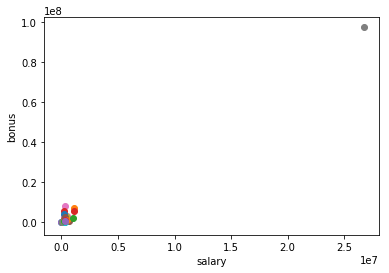

In [7]:
# 确定查找异常值的features
features = ['salary', 'bonus']

# 从数据集中提取数据
data = featureFormat(data_dict, features)

# 画图观察
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)
    
matplotlib.pyplot.xlabel('salary')
matplotlib.pyplot.ylabel('bonus')
matplotlib.pyplot.show()

从图中发现一个异常值，其'salary'大于2500万美元，'bonus'大于8000万美元，远远超过其他数据。

In [8]:
# 查找异常值的person_name
for person_name in data_dict:
    if data_dict[person_name]['salary'] > 25000000 and data_dict[person_name]['salary'] != 'NaN' \
    and data_dict[person_name]['bonus'] > 80000000 and data_dict[person_name]['bonus'] != 'NaN' :
        print person_name

TOTAL


结果发现，该异常值的“姓名”为"TOTAL"，回到源数据中查看发现，这个异常值是其他所有人各项数据的汇总，将其在数据集中剔除。

In [9]:
# 剔除“姓名”为“TOTAL”的异常值
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

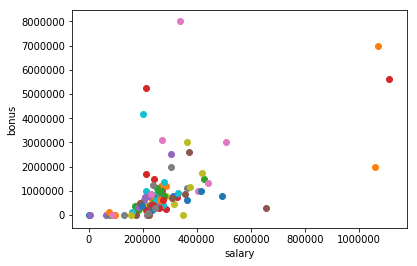

In [10]:
# 重新画图观察，是否还有异常值
# 从数据集中提取数据
data = featureFormat(data_dict, features)

# 画图观察
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)
    
matplotlib.pyplot.xlabel('salary')
matplotlib.pyplot.ylabel('bonus')
matplotlib.pyplot.show()

从图中发现，还有两个异常值，其‘salary’ 和 ‘bonus’ 都接近于0，再次查看两个异常值的‘person_name’。

In [11]:
for person_name in data_dict:
    if data_dict[person_name]['salary'] > 1000000 and data_dict[person_name]['bonus'] > 5000000 and \
    data_dict[person_name]['salary'] != 'NaN' and data_dict[person_name]['bonus'] != 'NaN' :
        print person_name

LAY KENNETH L
SKILLING JEFFREY K


剩下两个是SKILLING JEFFREY K和LAY KENNETH L。他们分别是安然公司的CEO和董事长，他们是整个安然欺诈事件中最大的嫌疑犯。他们能有这么高的薪水和奖金也就不足为奇了。他们不是真的异常值，因此不对他们进行处理。

## 二、优化特征选择

### 1.创建新特征

邮件相关的特征中有"to_messages"（发往某一特定邮箱的邮件数量）和"from_poi_to_this_person"（嫌疑人发往某一特定邮箱的邮件数量）两个特征，利用这两个特征的比值创建一个新的特征 ratio_from_poi，表示某一特定邮箱收到的所有邮件中来自于嫌疑人的邮件数量占比。

创建这个新特征的理由是：我们倾向于认为，某一特定邮箱接收的邮件来自于嫌疑人的比例越大，这一邮箱的使用者越有可能也是嫌疑人。

In [12]:
# 创建 ratio_from_poi 新特征
def fraction_from_poi(from_poi_to_this_person, to_messages):
    if from_poi_to_this_person == 'NaN' or to_messages == 'NaN':
        ratio_from_poi = 0.
    else:
        ratio_from_poi = float(from_poi_to_this_person) / float(to_messages)
    
    return ratio_from_poi

In [13]:
# 将新特征写入data_dict
for person_name in data_dict:
    data_dict[person_name]['ratio_from_poi'] = fraction_from_poi(
        data_dict[person_name]['from_poi_to_this_person'],
        data_dict[person_name]['to_messages'])

### 2.选择最优特征

In [14]:
features_list_all = ['poi','salary', 'deferral_payments', 'total_payments',
                     'loan_advances', 'bonus', 'restricted_stock_deferred',
                     'deferred_income', 'total_stock_value', 'expenses', 
                     'exercised_stock_options', 'other', 'long_term_incentive',
                     'restricted_stock', 'director_fees','to_messages', 
                     'from_poi_to_this_person', 'from_messages',
                     'from_this_person_to_poi', 'shared_receipt_with_poi']

data = featureFormat(data_dict, features_list_all)
labels, features = targetFeatureSplit(data)

In [15]:
# 使用SelectKBest方法选择最优特征
from sklearn.feature_selection import SelectKBest, f_classif

# 查看特征评分
selector = SelectKBest(f_classif)
scores = selector.fit(features, labels).scores_
print scores

[ 18.57570327   0.21705893   8.86672154   7.2427304   21.06000171
   0.06498431  11.59554766  24.46765405   6.23420114  25.09754153
   4.20497086  10.07245453   9.34670079   2.10765594   1.69882435
   5.34494152   0.1641645    2.42650813   8.74648553]


观察全部19个特征（排除了纯文本特征email_address）的得分，并通过手工更改k的取值反复测试，发现当k为5时机器学习模型的评估指标得分最高。

In [16]:
# 查看特征名称
selector = SelectKBest(f_classif, k = 5).fit(features, labels)
index = selector.get_support(indices = True)
tmp_list = features_list_all[1:]

#输出最优特征列表
features_list_best = []
for i in index:
    features_list_best.append(tmp_list[i])

# 将 'poi' 添加至特征列表的第一位
features_list_best = ['poi', 'salary', 'bonus', 'deferred_income', 'total_stock_value', 'exercised_stock_options']

print features_list_best

['poi', 'salary', 'bonus', 'deferred_income', 'total_stock_value', 'exercised_stock_options']


## 三、选择、调整并验证评估

### 1.选择算法

目前所学的，适用于本项目预测POIs的算法主要有以下几种：

1. 朴素贝叶斯（Naive Bayes）
2. 支持向量机（SVM）
3. 决策树（Decision Tree）
4. K-最近邻（K-Nearest Neighbors）
5. Adaboost
6. 随机森林（Random Forest）

本项目拟采用以上算法分别进行建立评估。

### 2.参数调整的意义

机器学习的算法是由参数驱动的。这些参数对于学习的效果有极其明显的影响。参数调整的目的是尽可能的为每个参数寻找最优值，以改善模型正确率。

### 3.模型评估的指标选取

我们分别使用精确度precision和召回率recall这两个指标来评估模型的好坏。

常见的评估指标的定义如下：

- Accuracy = (true positives + true negatives) / (total examples)
- Precision = (true positives) / (true positives + false positives)
- Recall = (true positives) / (true positives + false negatives)
- F1 score = (2 precision recall) / (precision + recall)


在本项目中，我们的最终目的是尽可能的识别出潜在的POIs。若使用Accuracy进行模型评估，它会将模型准确预测出POI和非POI的数量都计算在内，又因为安然数据集极不平衡，POI相对全部个体占比不足15%，那么使用Accuracy带来的问题就是模型即便没有准确预测出POI，也会因准确预测了大量的非POI而偏离建模目的。

那么对于本项目而言，我们其实是希望模型尽可能多的给我们提供潜在POI人选，如果判断错了也没e什么，类似于“宁可错杀一千，不可放过一个”。而recall的使用情形，一般适用于我们希望被“冤枉”的越少越好。所以本项目中选择使用Precision作为模型的评估指标最为合适。Precision越高，表明我们预测的假正例越少，也就是那些是POI却没有被识别出来的个体越少。

### 4.验证及其重要性

验证是用于评估模型好坏的一个重要方法，我们通常将数据集分为训练集和测试集就是为了验证的方便。前者用以建立模型（model），后者则用来评估该模型对未知样本进行预测时的泛化能力。我们需要在测试集上进行验证，来确定训练集是否“过拟合”或者“欠拟合”。不同的数据集和训练集的划分方法，也会对验证的效果产生一定影响。

### 5.交叉验证策略

对于本项目而言，使用StratifiedShuffleSplit进行交叉验证较为合适。因为数据集本身类别分布极不均匀，StratifiedShuffleSplit可以确保测试集和训练集中类之间的比例分配基本一致。通过该方法可以有效提升学习算法的评估准确度。

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
# StratifiedShuffleSplit交叉验证，设置n_splits = 3，test_size = 0.3
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)

### 6.建模并评估

#### 6.1 朴素贝叶斯（Naive Bayes）

朴素贝叶斯的机器学习模型建立如下：

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from tester import test_classifier

# 创建分类器
clf_NB = GaussianNB()

## 使用StratifiedShuffleSplit进行交叉验证
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)
  
# 使用GridSearchCV选择最佳参数
para_NB = {}
clf_NB = GridSearchCV(clf_NB, para_NB, cv = cv, scoring = 'f1')

# 模型评分
test_classifier(clf_NB, data_dict, features_list_best, folds = 1000)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.85464	Precision: 0.48876	Recall: 0.38050	F1: 0.42789	F2: 0.39814
	Total predictions: 14000	True positives:  761	False positives:  796	False negatives: 1239	True negatives: 11204



#### 6.2 支持向量机（SVM）

支持向量机的机器学习模型构建如下：

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# 创建分类器
clf_svm = SVC()

# 特征缩放
min_max_scaler = MinMaxScaler()

# 使用stratifiedShuffleSplit进行交叉验证
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)

# 使用pipeline封装特征缩放和分类器
pip_svm = Pipeline(steps = [
    ('scaler', min_max_scaler),
    ('svc', clf_svm)
])

# 使用GridSearchCV选择最佳参数
para_svm = {'svc__kernel': ('linear', 'rbf'), 'svc__C': [0.1, 1, 10]}
clf_svm = GridSearchCV(pip_svm, para_svm, cv = cv, scoring = 'f1')

# 模型评分
test_classifier(clf_svm, data_dict, features_list_best, folds = 1000)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__kernel': ('linear', 'rbf'), 'svc__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.84929	Precision: 0.32595	Recall: 0.05150	F1: 0.08895	F2: 0.06193
	Total predictions: 14000	True positives:  103	False positives:  213	False negatives: 1897	True negatives: 11787



#### 6.3 决策树（Decision Tree）

对于DecisionTreeClassifier的参数，由于本数据集特征较少，样本量也不大，多数参数均可使用默认值，但数据集中存在大量的缺失值，所以需要对参数min_weight_fraction_leaf进行设置。


min_weight_fraction_leaf参数限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

决策树的机器学习模型构建如下：

In [24]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# 创建分类器
clf_tree = DecisionTreeClassifier()

# 使用StratifiedShuffleSplit进行交叉验证
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)

# 使用GridSearchCV选择最佳参数
para_tree = {'min_weight_fraction_leaf': np.arange(0.01, 0.09, 0.01)}
clf_tree = GridSearchCV(clf_tree, para_tree, cv = cv, scoring = 'f1')

# 模型评分
test_classifier(clf_tree, data_dict, features_list_best, folds = 1000)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_weight_fraction_leaf': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.83007	Precision: 0.34779	Recall: 0.21650	F1: 0.26687	F2: 0.23418
	Total predictions: 14000	True positives:  433	False positives:  812	False negatives: 1567	True negatives: 11188



#### 6.4 K-最近邻（K-Nearest Neighbors）

K-最近邻的机器学习模型构建如下：

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# 创建分类器
clf_knn = KNeighborsClassifier()

# 使用StratifiedShuffleSplit进行交叉验证
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)

# 因K-NN算法使用距离判断邻居的远近，需使用缩放特征
min_max_scale = MinMaxScaler()

# 使用pipeline封装特征缩放和分类器
pip_knn = Pipeline(steps = [
    ('scaler', min_max_scaler),
    ('clf', clf_knn)
])

# 使用GridSearchCV进行参数调优
para_knn = {
    'clf__n_neighbors': range(1,4),
    'clf__weights': ('uniform', 'distance'),
    'clf__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')
}

clf_knn = GridSearchCV(pip_knn, para_knn, cv = cv, scoring = 'f1')

# 模型评分
test_classifier(clf_knn, data_dict, features_list_best, folds = 1000)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__weights': ('uniform', 'distance'), 'clf__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'clf__n_neighbors': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.82086	Precision: 0.32603	Recall: 0.23800	F1: 0.27514	F2: 0.25159
	Total predictions: 14000	True positives:  476	False positives:  984	False negatives: 1524	True negatives: 11016



#### 1.5 AdaBoost

在scikit-learn中，AdaBoostClassifier的框架参数主要有：

1. base_estimator: 它是指弱学习分类器，默认是决策树。同时，决策树弱学习分类器的参数也是可以调整的。  

2. algorithm: scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME将样本集分类效果作为弱学习器权重，而SAMME.R则将样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R，则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。  

3. n_estimators: 它指弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，默认是50。在实际调参的过程中，常常将n_estimators和参数learning_rate一起考虑。  

4. learning_rate: 每个弱学习器的权重缩减系数。取值范围为0<ν≤1。对于同样的训练集拟合效果，较小的ν意味着需要更多的弱学习器的迭代次数。实践中通常用步长和迭代最大次数一起来决定算法的拟合效果。所以这两个参数n_estimators和learning_rate要一起调参。一般来说，可以从一个小一点的ν开始调参，默认是1。 

AdaBoost的机器学习模型建立如下：

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# 建立模型
clf_ada = AdaBoostClassifier()

# 使用StratifiedShuffleSplit进行交叉验证
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)

# 由于AdaBoost模型训练时间过长，使用RandomizedSearchCV进行参数调优
para_ada = {
    'n_estimators': [40, 60],
    'learning_rate': [0.5, 1]
}

clf_ada = RandomizedSearchCV(clf_ada, para_ada, n_iter = 3, cv = cv, scoring = 'f1')

# 模型评分
test_classifier(clf_ada, data_dict, features_list_best, folds = 1000)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
          error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'n_estimators': [40, 60], 'learning_rate': [0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)
	Accuracy: 0.83179	Precision: 0.36783	Recall: 0.24700	F1: 0.29554	F2: 0.26437
	Total predictions: 14000	True positives:  494	False positives:  849	False negatives: 1506	True negatives: 11151



#### 1.6 随机森林（Random Forest）

随机森林机器学习模型构建如下：

In [32]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
clf_rf = RandomForestClassifier()

# 使用StratifiedShuffleSplit进行交叉验证
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)

# 由于训练时间过长，使用RandomizedSearchCV进行参数调优
para_rf = {
    'criterion': ('gini', 'entropy'),
    'min_weight_fraction_leaf': [0.04, 0.1]
}

clf_rf = RandomizedSearchCV(clf_rf, para_rf,n_iter = 3, cv = cv, scoring = 'f1')

# 模型评分
test_classifier(clf_rf, data_dict, features_list_best, folds = 1000)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'min_weight_fraction_leaf': [0.04, 0.1], 'criterion': ('gini', 'entropy')},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)
	Accuracy: 0.85636	Precision: 0.48775	Recall: 0.10950	F1: 0.17885	F2: 0.12960
	Total predictions: 14000	True positiv

## 四、最终模型

### 1. 模型结果对比

朴素贝叶斯、支持向量机、决策树和K-NN的模型效果如下：

1.朴素贝叶斯：

```
GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.85464	Precision: 0.48876	Recall: 0.38050	F1: 0.42789	F2: 0.39814
	Total predictions: 14000	True positives:  761	False positives:  796	False negatives: 1239	True negatives: 11204
```

2.支持向量机：

```
GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__kernel': ('linear', 'rbf'), 'svc__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.84929	Precision: 0.32595	Recall: 0.05150	F1: 0.08895	F2: 0.06193
	Total predictions: 14000	True positives:  103	False positives:  213	False negatives: 1897	True negatives: 11787

```

3.决策树：

```
GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_weight_fraction_leaf': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.83007	Precision: 0.34779	Recall: 0.21650	F1: 0.26687	F2: 0.23418
	Total predictions: 14000	True positives:  433	False positives:  812	False negatives: 1567	True negatives: 11188
```

4.K-近邻：

```
GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__weights': ('uniform', 'distance'), 'clf__algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'clf__n_neighbors': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.82086	Precision: 0.32603	Recall: 0.23800	F1: 0.27514	F2: 0.25159
	Total predictions: 14000	True positives:  476	False positives:  984	False negatives: 1524	True negatives: 11016
```

5.AdaBoost：

```
RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
          error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'n_estimators': [40, 60], 'learning_rate': [0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)
	Accuracy: 0.83179	Precision: 0.36783	Recall: 0.24700	F1: 0.29554	F2: 0.26437
	Total predictions: 14000	True positives:  494	False positives:  849	False negatives: 1506	True negatives: 11151
```

6.随机森林：

```
RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'min_weight_fraction_leaf': [0.04, 0.1], 'criterion': ('gini', 'entropy')},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)
	Accuracy: 0.85636	Precision: 0.48775	Recall: 0.10950	F1: 0.17885	F2: 0.12960
	Total predictions: 14000	True positives:  219	False positives:  230	False negatives: 1781	True negatives: 11770

```

经对比以上六种模型的结果，朴素贝叶斯的各项评分均高于其他模型。所以选择**朴素贝叶斯**作为最终模型。

### 2.添加新特征对模型预测结果的影响

In [29]:
# 添加新特征后的特征列表
features_list_best_new = ['poi', 'salary', 'bonus',
                          'deferred_income', 'total_stock_value', 
                          'exercised_stock_options', 'ratio_from_poi']

# 模型评分
test_classifier(clf_NB, data_dict, features_list_best_new)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
	Accuracy: 0.86050	Precision: 0.51572	Recall: 0.38550	F1: 0.44120	F2: 0.40600
	Total predictions: 14000	True positives:  771	False positives:  724	False negatives: 1229	True negatives: 11276



In [30]:
print "加入新特征后，各项评分指标变动情况如下："
print "Accuracy 变动：", (0.86050 - 0.85464)
print "Precision 变动:", (0.51572 - 0.48876)
print "Recall 变动:", (0.38550 - 0.38050)
print "F1 变动:", (0.44120 - 0.42789)
print "F2 变动:", (0.40600 - 0.39814)

加入新特征后，各项评分指标变动情况如下：
Accuracy 变动： 0.00586
Precision 变动: 0.02696
Recall 变动: 0.005
F1 变动: 0.01331
F2 变动: 0.00786


各项指标均有提升，说明'ratio_from_poi'指标对于模型预测POI的准确率具有正向影响。